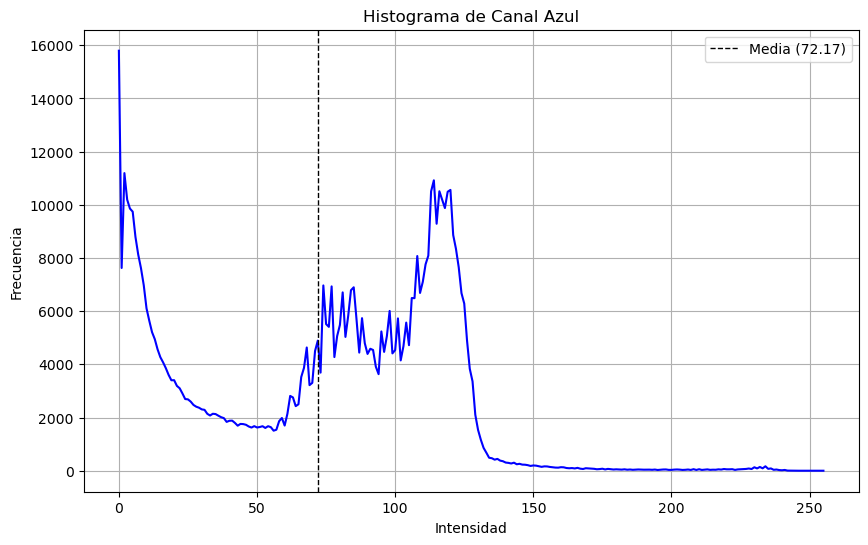

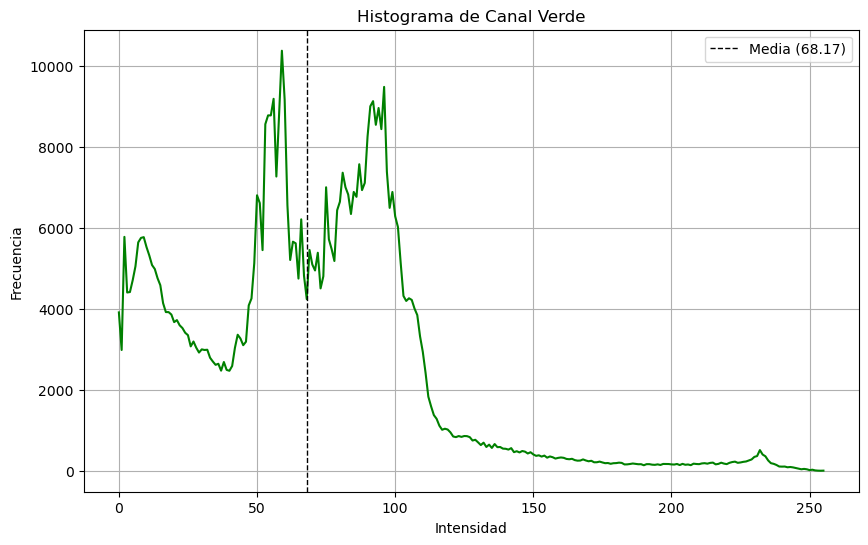

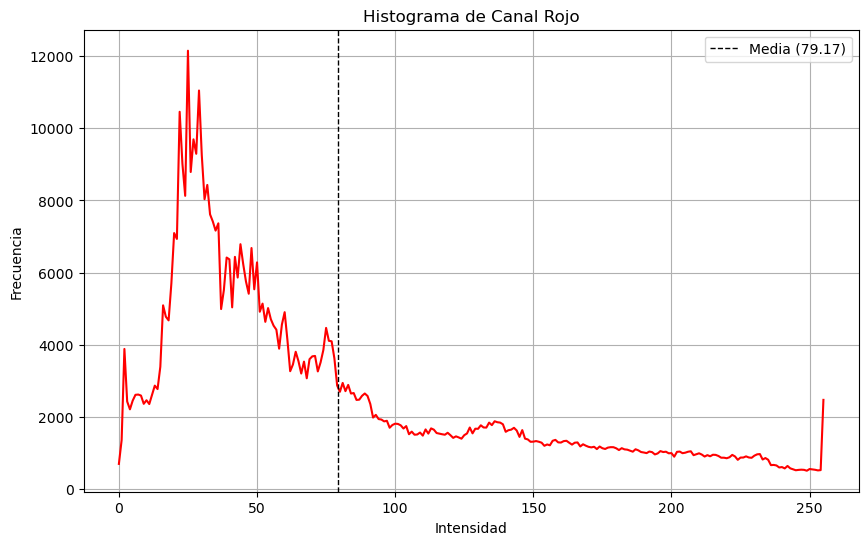

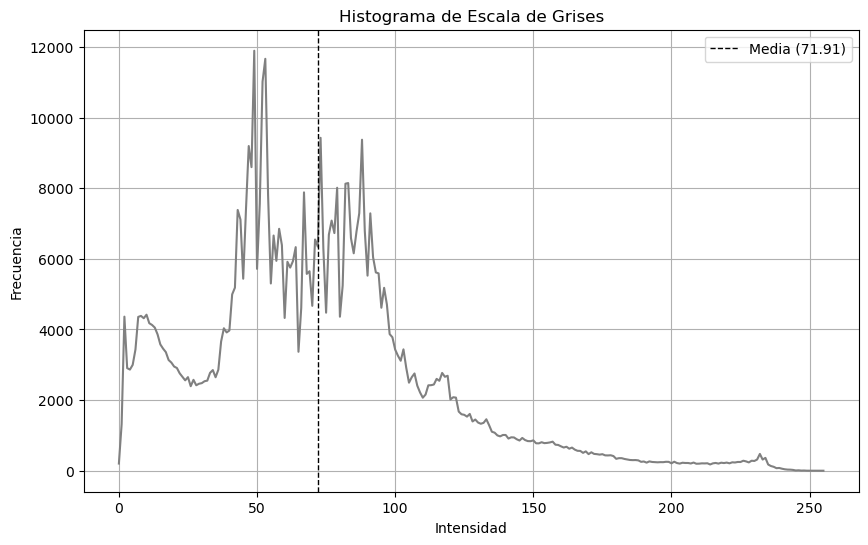

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histograma_con_media(img, color, titulo):
    """
    Muestra el histograma de una imagen con una línea vertical que indica la media.
    
    :param img: Imagen en escala de grises.
    :param color: Color de la línea del histograma.
    :param titulo: Título del gráfico.
    """
    hist, bins = np.histogram(img, bins=256, range=(0, 256))
    bins = bins[:-1]  # Ajustar bins para que coincida con la longitud de hist
    media = np.sum(hist * bins) / np.sum(hist)

    plt.figure(figsize=(10, 6))
    plt.title(f"Histograma de {titulo}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.plot(bins, hist, color=color)
    plt.axvline(x=media, color='k', linestyle='dashed', linewidth=1, label=f'Media ({media:.2f})')
    plt.legend()
    plt.grid(True)
    plt.show()

def mostrar_histogramas(image_path):
    """
    Muestra los histogramas de los canales azul, verde, rojo y la imagen en escala de grises.
    
    :param image_path: Ruta a la imagen en formato BGR.
    """
    img_color = cv2.imread(image_path)

    if img_color is None:
        raise FileNotFoundError(f"No se pudo leer la imagen: {image_path}")
    
    img_b, img_g, img_r = cv2.split(img_color)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    histograma_con_media(img_b, 'blue', 'Canal Azul')
    histograma_con_media(img_g, 'green', 'Canal Verde')
    histograma_con_media(img_r, 'red', 'Canal Rojo')
    histograma_con_media(img_gray, 'gray', 'Escala de Grises')

# Ruta de la imagen
image_path = "volcan.jpeg"
mostrar_histogramas(image_path)


## Problem 5

El enfoque de escala de grises ponderado es una técnica para convertir una imagen en color a escala de grises de una manera que preserva mejor la percepción visual. En lugar de simplemente promediar los valores de los canales de color, se aplican ponderaciones específicas a cada canal de color basadas en la percepción humana del brillo. Esto es importante porque el ojo humano no percibe los colores con la misma intensidad.

Enfoque de Escala de Grises Ponderado
La fórmula más común para convertir una imagen a escala de grises ponderada es:

Y = 0.299×R + 0.587×G + 0.114×B 

Aquí:
R es el valor del canal rojo.
G es el valor del canal verde.
B es el valor del canal azul.
Y es el valor en escala de grises resultante.

Los coeficientes 
0.299, 0.587 y 0.114 se derivan de cómo el ojo humano percibe la intensidad de los colores. El verde tiene el mayor peso porque el ojo humano es más sensible a ese color.


In [4]:
import cv2
import numpy as np

def escala_grises_ponderada(image_path, output_path):
    """
    Convierte una imagen a escala de grises usando el enfoque ponderado.
    
    :param image_path: Ruta de la imagen en formato BGR.
    :param output_path: Ruta para guardar la imagen en escala de grises.
    """
    # Leer la imagen
    img_color = cv2.imread(image_path)
    
    if img_color is None:
        raise FileNotFoundError(f"No se pudo leer la imagen: {image_path}")

    # Convertir la imagen a escala de grises usando el enfoque ponderado
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Guardar la imagen en escala de grises
    cv2.imwrite(output_path, img_gray)

    return img_gray

# Ruta de la imagen y de salida
image_path = "volcan.jpeg"
output_path = "volcan_grayscale_weighted.jpg"

# Aplicar la conversión a escala de grises ponderado
img_gray = escala_grises_ponderada(image_path, output_path)

# Mostrar la imagen en escala de grises
cv2.imshow('Escala de Grises Ponderado', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Problem 6

El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que representa los colores de una manera más intuitiva para los humanos, comparado con el modelo RGB. Es especialmente útil en aplicaciones de procesamiento de imágenes y edición de gráficos debido a su forma más cercana a cómo percibimos el color.

### Componentes del Espacio de Color HSV

1. **Hue (Matiz):** Representa el color en sí mismo y se mide en grados (0° a 360°). En este componente, los valores indican los colores primarios (rojo, verde, azul, etc.) y sus combinaciones. Por ejemplo:
   - 0°: Rojo
   - 60°: Amarillo
   - 120°: Verde
   - 180°: Cian
   - 240°: Azul
   - 300°: Magenta

2. **Saturation (Saturación):** Indica la intensidad del color. Se mide en porcentaje (0% a 100%). Una saturación del 0% resulta en gris (sin color), mientras que 100% indica el color puro sin mezcla de gris.

3. **Value (Valor o Brillo):** Representa la luminosidad del color, también medido en porcentaje (0% a 100%). Un valor de 0% resulta en negro, mientras que 100% representa el color en su máxima luminosidad.

### Mapeo de Colores al Espacio HSV

La conversión entre el espacio de color RGB y HSV implica una serie de cálculos matemáticos. Aquí se explica brevemente cómo se realiza este mapeo:

1. **Conversion de RGB a HSV:**
   - **Normalize RGB:** Los valores RGB se normalizan dividiendo por 255 (para obtener valores en el rango [0, 1]).
   - **Calcular Value (V):** El valor máximo de los componentes normalizados de RGB.
   - **Calcular Saturation (S):** Calculado como \((V - \text{min}(R, G, B)) / V\) si \(V \neq 0\), y 0 si \(V = 0\).
   - **Calcular Hue (H):** 
     - Si \(V = R\), entonces \(H = 60 \times ((G - B) / (V - \text{min}(R, G, B)) \mod 6)\)
     - Si \(V = G\), entonces \(H = 60 \times ((B - R) / (V - \text{min}(R, G, B)) + 2)\)
     - Si \(V = B\), entonces \(H = 60 \times ((R - G) / (V - \text{min}(R, G, B)) + 4)\)
   - Ajustar \(H\) para que esté en el rango [0, 360] grados.

2. **Conversion de HSV a RGB:**
   - **Calcular C (Chroma):** \(C = V \times S\)
   - **Calcular X:** \(X = C \times (1 - |(H / 60) \mod 2 - 1|)\)
   - **Calcular m:** \(m = V - C\)
   - **Mapeo basado en el sector del color:** Dependiendo del rango de \(H\) (0-60, 60-120, etc.), se determina el valor de RGB.
   - **Reescala y ajusta:** Los valores finales se reescalan al rango de 0-255.



In [ ]:
import cv2
import numpy as np

# Leer imagen en formato BGR (por defecto en OpenCV)
img_bgr = cv2.imread('imagen.jpg')

# Convertir de BGR a HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Convertir de HSV a BGR
img_bgr_converted = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

# Mostrar imágenes
cv2.imshow('Imagen BGR', img_bgr)
cv2.imshow('Imagen HSV', img_hsv)
cv2.imshow('Imagen Convertida BGR', img_bgr_converted)

cv2.waitKey(0)
cv2.destroyAllWindows()
